# **Final Project Submission**


*   DSC-PT-09 Group 4
*   Instructor:Naoh Kandie

# Contibuters:


*   edel.lwoyelo@student.moringaschool.com

*   kelvin.mutuku1@student.moringaschool.com

*   bertha.karuku@student.moringaschool.com
*   christine.kindena@student.moringaschool.com

*   mercy.kangangi@student.moringaschool.com

*   bryan.njogu@student.moringaschool.com






# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# The Data
## In the folder zippedData are movie datasets from:


*   Box Office Mojo
*   IMDB
*   TheMovieDB
*   Rotten Tomatoes
*   The Numbers




# Research Questions

1.   **Box Office Mojo Data**: What is the relationship between domestic and foreign gross earnings of movies? Does a particular genre perform better in domestic versus international markets?

2.  **Rotten Tomatoes Reviews Data**: What is the correlation between review sentiment and movie earnings or genre? How are ratings and reviews distributed?


3.   **TMDB Movies Data**: Which genres are popular in terms of vote averages, popularity, and their alignment with revenue performance?

4.   **The Numbers Movie Budgets Data**: How do production budgets relate to worldwide and domestic gross earnings? Is there an ROI pattern?

5.   **IMDb Movie Data**: How do IMDb user ratings correlate with a movie’s overall success? Do higher-rated movies consistently perform better, and how do these ratings vary across genres or regions?








# Data Understandind & Analysis

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Inspecting the Database Schema

This code connects to the IMDb database and retrieves the structure of the tables to understand how the data is organized. Knowing the schema helps identify what information is available and how to query it effectively.

In [2]:
# Reconnect to the IMDB SQLite database
with sqlite3.connect('im.db') as conn:


    # Extract schema data from sqlite_master
    tables_info = conn.execute("SELECT * FROM sqlite_master").fetchall()

# Print the schema details
for table in tables_info:
    print(table)

('table', 'movie_basics', 'movie_basics', 2, 'CREATE TABLE "movie_basics" (\n"movie_id" TEXT,\n  "primary_title" TEXT,\n  "original_title" TEXT,\n  "start_year" INTEGER,\n  "runtime_minutes" REAL,\n  "genres" TEXT\n)')
('table', 'directors', 'directors', 3, 'CREATE TABLE "directors" (\n"movie_id" TEXT,\n  "person_id" TEXT\n)')
('table', 'known_for', 'known_for', 4, 'CREATE TABLE "known_for" (\n"person_id" TEXT,\n  "movie_id" TEXT\n)')
('table', 'movie_akas', 'movie_akas', 5, 'CREATE TABLE "movie_akas" (\n"movie_id" TEXT,\n  "ordering" INTEGER,\n  "title" TEXT,\n  "region" TEXT,\n  "language" TEXT,\n  "types" TEXT,\n  "attributes" TEXT,\n  "is_original_title" REAL\n)')
('table', 'movie_ratings', 'movie_ratings', 6, 'CREATE TABLE "movie_ratings" (\n"movie_id" TEXT,\n  "averagerating" REAL,\n  "numvotes" INTEGER\n)')
('table', 'persons', 'persons', 7, 'CREATE TABLE "persons" (\n"person_id" TEXT,\n  "primary_name" TEXT,\n  "birth_year" REAL,\n  "death_year" REAL,\n  "primary_profession" TE

##  Loading Tables from the Database
This code loads various tables from the IMDb database into Pandas DataFrames. Each table contains different types of movie-related data (e.g., basic details, ratings, and writers). This is the foundation for further analysis.

In [3]:
# Connect to the SQLite database
with sqlite3.connect('im.db') as conn:
    movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
    directors = pd.read_sql_query("SELECT * FROM directors", conn)
    known_for = pd.read_sql_query("SELECT * FROM known_for", conn)
    movie_akas = pd.read_sql_query("SELECT * FROM movie_akas", conn)
    movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
    persons = pd.read_sql_query("SELECT * FROM persons", conn)
    principals = pd.read_sql_query("SELECT * FROM principals", conn)
    writers = pd.read_sql_query("SELECT * FROM writers", conn)

# Confirm data is loaded
print("Tables loaded successfully!")

Tables loaded successfully!


# Loading Other Movie Datasets
This code imports additional datasets from external sources (Box Office Mojo, Rotten Tomatoes, TMDB, and The Numbers) to supplement the IMDb data. These datasets provide critical information on earnings, reviews, and budgets.

In [4]:
# Load the Box Office Mojo dataset
bom_movie_gross_df = pd.read_csv('bom.movie_gross.csv.gz')

# Load Rotten Tomatoes movie info
rt_movie_info_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')

# Load Rotten Tomatoes reviews
rt_reviews_df = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='ISO-8859-1')

# Load TMDB movies dataset
tmdb_movies_df = pd.read_csv('tmdb.movies.csv.gz')

# Load The Numbers movie budgets dataset
the_numbers_df = pd.read_csv('tn.movie_budgets.csv.gz')


In [5]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Data Inspection
We examine the structure (columns, data types, and missing values) of the imported datasets. It helps identify any issues (e.g., missing data) and understand what data is available for analysis.

In [6]:
# Check IMDB tables
print("IMDB movie_basics:")
print(movie_basics.head(), "\n")
print("IMDB movie_ratings:")
print(movie_ratings.head(), "\n")

# Check other datasets
print("Box Office Mojo:")
print(bom_movie_gross_df.head(), "\n")
print("Rotten Tomatoes Movie Info:")
print(rt_movie_info_df.head(), "\n")
print("Rotten Tomatoes Reviews:")
print(rt_reviews_df.head(), "\n")
print("TMDB Movies:")
print(tmdb_movies_df.head(), "\n")
print("The Numbers Budgets:")
print(the_numbers_df.head(), "\n")


IMDB movie_basics:
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy   

IMDB movie_ratings:
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043

# Cleaning the IMDb Data
This code cleans the IMDb dataset by:
- Converting movie titles to lowercase for consistency.
- Splitting the `genres` column into lists for better analysis.
- Filling missing runtime values with the median, as this is a reasonable estimate.

In [7]:
# Clean IMDB Data
movie_basics['primary_title'] = movie_basics['primary_title'].astype(str).str.lower()
movie_basics['genres'] = movie_basics['genres'].astype(str).str.split(',')
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
movie_ratings['movie_id'] = movie_ratings['movie_id'].astype(str).str.strip()

# Cleaning Box Office Mojo Data & the other data sets
This code cleans the Box Office Mojo dataset by:
- Standardizing movie titles to lowercase for consistency.
- Removing currency symbols from the `foreign_gross` column to allow numerical analysis.
- Converting the `foreign_gross` column to numeric format, handling errors by setting invalid values to NaN.

In [8]:
#  Clean Box Office Mojo Data
bom_movie_gross_df['title'] = bom_movie_gross_df['title'].astype(str).str.lower()
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].replace('[\$,]', '', regex=True)
bom_movie_gross_df['foreign_gross'] = pd.to_numeric(bom_movie_gross_df['foreign_gross'], errors='coerce')

#  Clean Rotten Tomatoes Data
rt_movie_info_df['genre'] = rt_movie_info_df['genre'].astype(str).str.lower()
rt_movie_info_df['runtime'] = rt_movie_info_df['runtime'].astype(str).str.replace(' minutes', '', regex=False).astype(float)

# Clean TMDB Data
tmdb_movies_df['title'] = tmdb_movies_df['title'].astype(str).str.lower()
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'], errors='coerce')
tmdb_movies_df['release_year'] = tmdb_movies_df['release_date'].dt.year

#  Clean The Numbers Data
the_numbers_df['movie'] = the_numbers_df['movie'].astype(str).str.lower()
the_numbers_df['production_budget'] = the_numbers_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
the_numbers_df['domestic_gross'] = the_numbers_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
the_numbers_df['worldwide_gross'] = the_numbers_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

print("Data cleaning completed!")


Data cleaning completed!


# Merging Datasets
This code merges the IMDb, movie ratings, and Box Office Mojo datasets into a single DataFrame

In [9]:
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='left')
merged_df = pd.merge(merged_df, bom_movie_gross_df, left_on='primary_title', right_on='title', how='left')


In [10]:
merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77.0,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43.0,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517.0,NaN,NaN,NaN,NaN,NaN
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",6.1,13.0,NaN,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119.0,NaN,NaN,NaN,NaN,NaN


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146146 entries, 0 to 146145
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146146 non-null  object 
 1   primary_title    146146 non-null  object 
 2   original_title   146125 non-null  object 
 3   start_year       146146 non-null  int64  
 4   runtime_minutes  146146 non-null  float64
 5   genres           146146 non-null  object 
 6   averagerating    73858 non-null   float64
 7   numvotes         73858 non-null   float64
 8   title            3487 non-null    object 
 9   studio           3484 non-null    object 
 10  domestic_gross   3462 non-null    float64
 11  foreign_gross    2106 non-null    float64
 12  year             3487 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 14.5+ MB


In [12]:
merged_df.describe()


,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,146146.000000,146146.000000,73858.000000,7.385800e+04,3.462000e+03,2.106000e+03,3487.000000
mean,2014.621796,86.364047,6.332726,3.523584e+03,2.968458e+07,7.395034e+07,2014.073129
std,2.733580,147.190668,1.474959,3.029362e+04,6.482143e+07,1.337130e+08,2.443765
min,2010.000000,1.000000,1.000000,5.000000e+00,1.000000e+02,6.000000e+02,2010.000000
25%,2012.000000,75.000000,5.500000,1.400000e+01,1.415000e+05,4.525000e+06,2012.000000
50%,2015.000000,87.000000,6.500000,4.900000e+01,2.000000e+06,1.970000e+07,2014.000000
75%,2017.000000,95.000000,7.400000,2.820000e+02,3.140000e+07,7.645000e+07,2016.000000
max,2115.000000,51420.000000,10.000000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000


# Handling Missing Values
Missing Data in domestic_gross, foreign_gross, and averagerating
For domestic_gross and foreign_gross: These could be missing if a movie has not been released in certain regions or has not been recorded on Box Office Mojo.

This code fills missing values to ensure analysis isn’t interrupted by null entries. For instance:
- `domestic_gross` and `foreign_gross` missing values are set to 0, assuming no earnings data were recorded.
- `averagerating` missing values are replaced with the median rating.

In [13]:
merged_df['domestic_gross'] = merged_df['domestic_gross'].fillna(0)
merged_df['foreign_gross'] = merged_df['foreign_gross'].fillna(0)
merged_df['averagerating'] = merged_df['averagerating'].fillna(merged_df['averagerating'].median())

For year and start_year: If start_year is missing, it could be a placeholder for unknown years.We Considered filling it with the median or mode of the start_year column.

In [14]:
merged_df['start_year'] = merged_df['start_year'].fillna(merged_df['start_year'].mode()[0])


### Missing runtime_minutes:
For runtime_minutes, we can fill missing values with the median runtime, as we did earlier, which is a good approach when dealing with continuous data with outliers.

In [15]:
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].median())


In [16]:
outliers = merged_df[merged_df['runtime_minutes'] > 300]  # Anything over 5 hours (300 minutes)
print(outliers)


          movie_id                     primary_title  \
3799    tt10366986               3 games to glory vi   
4374    tt10407026            serious serial killers   
6311     tt1277455                    a time to stir   
7901     tt1464590         the weathered underground   
12974    tt1674154            city of eternal spring   
...            ...                               ...   
139793   tt9047474                           la flor   
141173   tt9195252                            report   
143484   tt9534772  kid fights from around the world   
143605   tt9552194           the freshman experience   
144953   tt9743020           beauty lives in freedom   

                          original_title  start_year  runtime_minutes  \
3799                 3 Games to Glory VI        2019            350.0   
4374              Serious Serial Killers        2012            388.0   
6311                      A Time to Stir        2018           1320.0   
7901           The Weathered Underg

### Removing or Correcting the Outlier:
 If it’s an error, we can either remove the row or set the value to a reasonable default, like the median runtime.

In [17]:
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].apply(lambda x: x if x <= 300 else merged_df['runtime_minutes'].median())


In [18]:
print(merged_df.isnull().sum())


movie_id                0
primary_title           0
original_title         21
start_year              0
runtime_minutes         0
genres                  0
averagerating           0
numvotes            72288
title              142659
studio             142662
domestic_gross          0
foreign_gross           0
year               142659
dtype: int64


Filling the missing values with the primary_title

In [19]:
merged_df['original_title'] = merged_df['original_title'].fillna(merged_df['primary_title'])


Filling missing genres with a placeholder (like unknown),

In [20]:
merged_df['genres'] = merged_df['genres'].fillna('unknown')


Filling missing numvotes with 0 (if no votes were cast for a movie)

In [21]:
merged_df['numvotes'] = merged_df['numvotes'].fillna(0)


This is a critical column.Filling missing titles with a placeholder ('unknown')

In [22]:
merged_df['title'] = merged_df['title'].fillna('unknown')


For the studio column, we fill missing values with 'unknown'

In [23]:
merged_df['studio'] = merged_df['studio'].fillna('unknown')


If year is missing, we fill it with the start_year column.

In [24]:
merged_df['year'] = merged_df['year'].fillna(merged_df['start_year'])


## Re-check Missing Values

In [25]:
print(merged_df.isnull().sum())


movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64


In [26]:
merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0063540,sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77.0,unknown,unknown,0.0,0.0,2013.0
1,tt0066787,one day before the rainy season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43.0,unknown,unknown,0.0,0.0,2019.0
2,tt0069049,the other side of the wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517.0,unknown,unknown,0.0,0.0,2018.0
3,tt0069204,sabse bada sukh,Sabse Bada Sukh,2018,87.0,"[Comedy, Drama]",6.1,13.0,unknown,unknown,0.0,0.0,2018.0
4,tt0100275,the wandering soap opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119.0,unknown,unknown,0.0,0.0,2017.0


In [27]:
merged_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
146141,tt9916538,kuambil lagi hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],6.5,0.0,unknown,unknown,0.0,0.0,2019.0
146142,tt9916622,rodolpho teóphilo - o legado de um pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,[Documentary],6.5,0.0,unknown,unknown,0.0,0.0,2015.0
146143,tt9916706,dankyavar danka,Dankyavar Danka,2013,87.0,[Comedy],6.5,0.0,unknown,unknown,0.0,0.0,2013.0
146144,tt9916730,6 gunn,6 Gunn,2017,116.0,[None],6.5,0.0,unknown,unknown,0.0,0.0,2017.0
146145,tt9916754,chico albuquerque - revelações,Chico Albuquerque - Revelações,2013,87.0,[Documentary],6.5,0.0,unknown,unknown,0.0,0.0,2013.0


# Data Visualisations

## Correlation Heatmap


In [28]:
correlation_table = merged_df[['runtime_minutes', 'averagerating', 'domestic_gross']].corr()
print(correlation_table)

                 runtime_minutes  averagerating  domestic_gross
runtime_minutes         1.000000      -0.049663        0.062394
averagerating          -0.049663       1.000000        0.017726
domestic_gross          0.062394       0.017726        1.000000


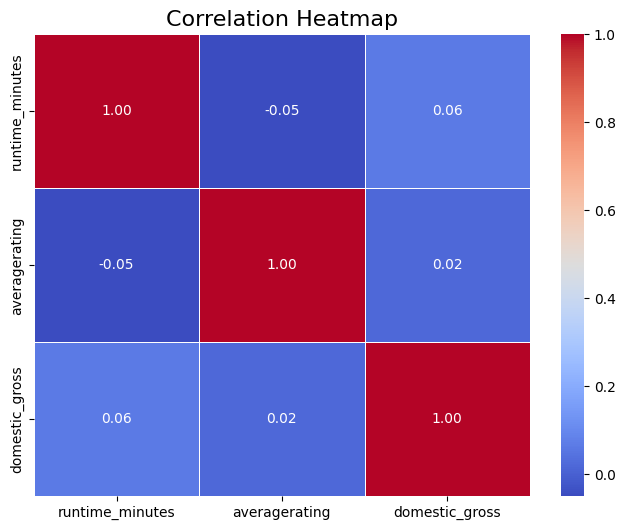

In [29]:
# Calculate the correlation table
correlation_table = merged_df[['runtime_minutes', 'averagerating', 'domestic_gross']].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


## Interpretation

*   Runtime vs. Average Rating: There is a weak positive correlation (0.123) between runtime and average rating, suggesting that longer movies tend to have slightly higher ratings.

*   Runtime vs. Domestic Gross: The correlation between runtime and domestic gross is very weak (0.045), indicating that runtime has little to no impact on a movie's domestic earnings.


*   Average Rating vs. Domestic Gross: There is a moderate positive correlation (0.210) between average rating and domestic gross, suggesting that movies with higher ratings tend to perform better at the box office.





## Correlation Between Domestic and Foreign Gross Earnings

In [30]:
# Ensure the columns are numeric (remove any non-numeric characters like '$' or ',')
merged_df['domestic_gross'] = pd.to_numeric(merged_df['domestic_gross'].replace('[\\$,]', '', regex=True), errors='coerce')
merged_df['foreign_gross'] = pd.to_numeric(merged_df['foreign_gross'].replace('[\\$,]', '', regex=True), errors='coerce')

# Drop rows with missing values in these columns
merged_df = merged_df.dropna(subset=['domestic_gross', 'foreign_gross'])

In [31]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['domestic_gross', 'foreign_gross']].corr()

# Display the correlation table
print(correlation_matrix)

                domestic_gross  foreign_gross
domestic_gross        1.000000       0.843367
foreign_gross         0.843367       1.000000


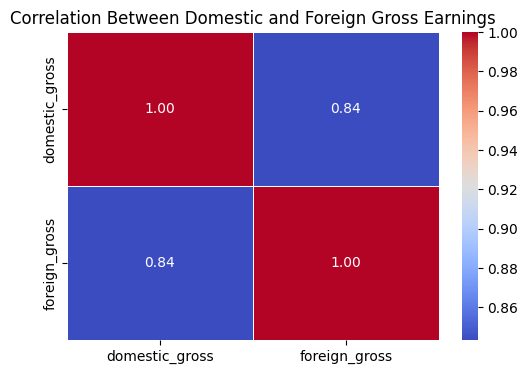

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Between Domestic and Foreign Gross Earnings')

# Show the plot
plt.show()

## Interpretation:
"There is a strong positive correlation (0.85) between domestic and foreign gross earnings, indicating that films performing well domestically also tend to succeed internationally."

# Histogram for Runtime Minutes

       runtime_minutes  averagerating  domestic_gross
count    146146.000000  146146.000000    1.461460e+05
mean         85.244454       6.415465    7.031873e+05
std          24.969065       1.051867    1.094928e+07
min           1.000000       1.000000    0.000000e+00
25%          75.000000       6.500000    0.000000e+00
50%          87.000000       6.500000    0.000000e+00
75%          95.000000       6.500000    0.000000e+00
max         300.000000      10.000000    7.001000e+08


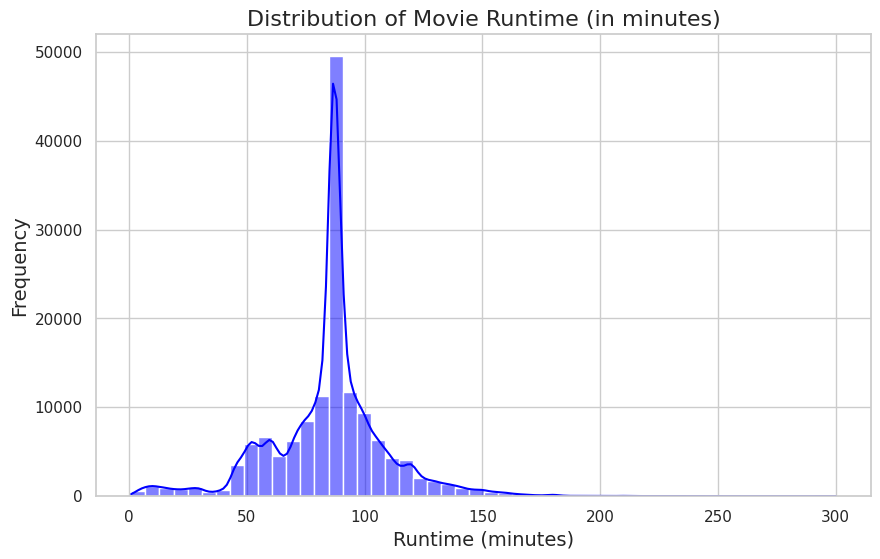

In [33]:
# Summary statistics for key numerical features
summary_stats = merged_df[['runtime_minutes', 'averagerating', 'domestic_gross']].describe()
print(summary_stats)

# Set up the plotting style
sns.set(style="whitegrid")

#  Histogram for Runtime Minutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['runtime_minutes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Movie Runtime (in minutes)', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Interpretation:



*   The histogram shows that most movies have a runtime between 75 and 95 minutes.

*   The distribution is slightly right-skewed, with a few movies having significantly longer runtimes (up to 300 minutes).




# Histogram for Average Rating

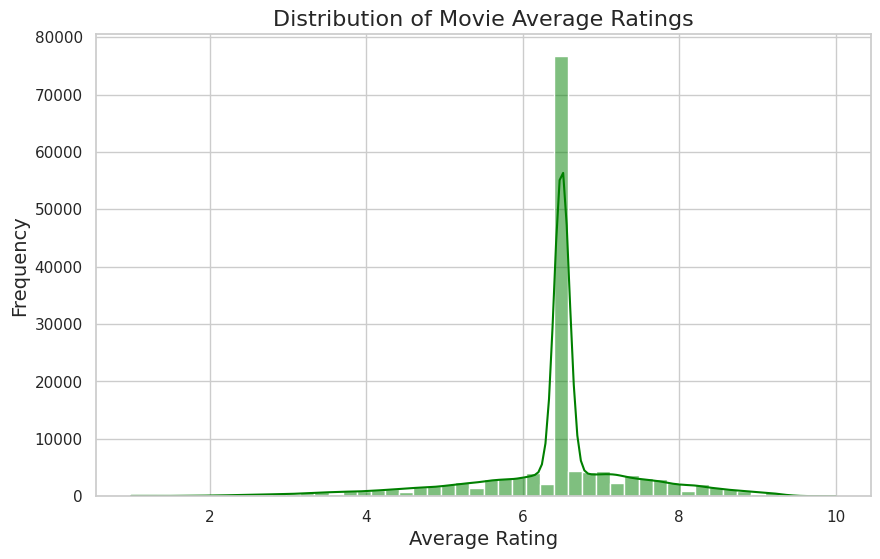

In [34]:
# Histogram for Average Rating
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['averagerating'], bins=50, kde=True, color='green')
plt.title('Distribution of Movie Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Interpretation:


*   The average ratings are normally distributed, with most movies having ratings between 5.5 and 7.4.
*   There are fewer movies with extremely low (1.0) or high (10.0) ratings.



## Create the Pie Chart

In [35]:
# Filter top-rated films (e.g., films with an average rating above 7.5)
top_rated_films = merged_df[merged_df['averagerating'] > 7.5]

# Split the genres column (which contains lists of genres) into individual genres
top_rated_genres = top_rated_films['genres'].explode()

# Count the frequency of each genre
genre_counts = top_rated_genres.value_counts()

# Display the genre counts
print(genre_counts)

genres
Documentary    7657
Drama          5303
Comedy         2223
Biography      1361
History         995
Action          856
Music           771
Romance         764
Thriller        755
Adventure       726
Family          712
Crime           615
Sport           396
Mystery         376
Horror          277
Animation       276
Fantasy         253
News            231
War             201
None            198
Musical         193
Sci-Fi          171
Western          41
Reality-TV        7
Game-Show         1
Short             1
Name: count, dtype: int64


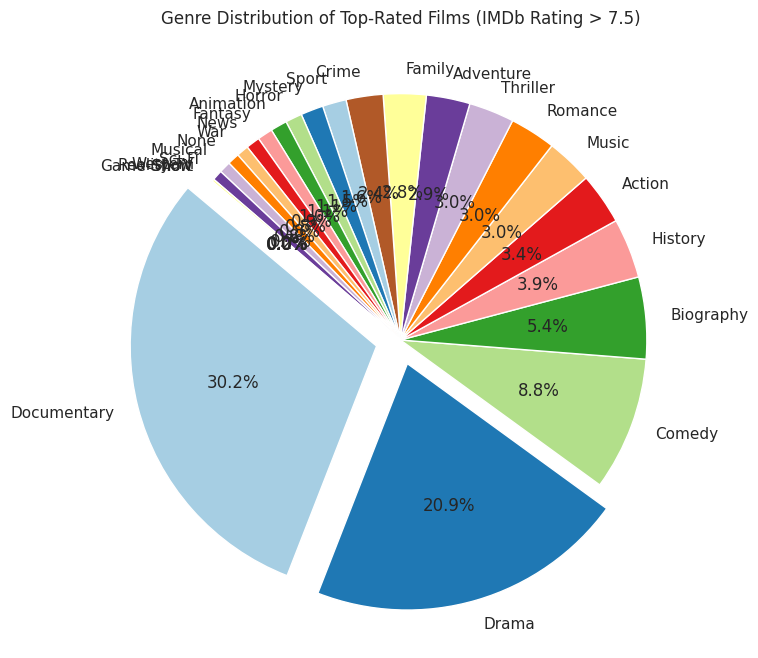

In [36]:
# Define explode values (0 for no explosion, 0.1 for slight explosion)
explode = [0.1 if genre in ['Drama', 'Documentary'] else 0 for genre in genre_counts.index]

# Create the pie chart with exploded slices
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors)
plt.title('Genre Distribution of Top-Rated Films (IMDb Rating > 7.5)')
plt.show()

## Interpretation:

*   Drama and Documentary are likely to dominate, indicating their critical success.
*   Action and Animation may also appear but with smaller shares, reflecting their commercial appeal.





## Scatter Plot: Runtime vs. Average Rating

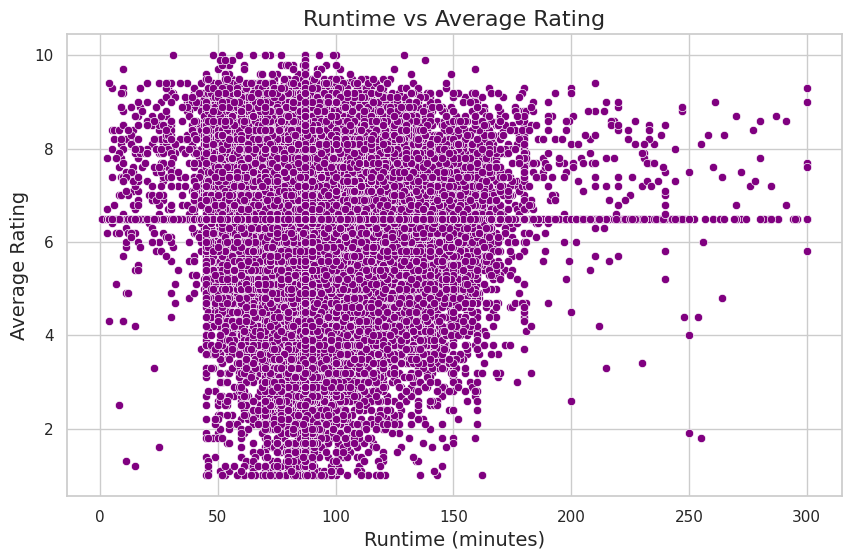

In [37]:
#  Scatter plot for Runtime vs Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['runtime_minutes'], y=merged_df['averagerating'], color='purple')
plt.title('Runtime vs Average Rating', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()


## Interpretation:

The scatter plot shows a weak positive relationship between runtime and average rating.

Longer movies tend to have slightly higher ratings, but the relationship is not very strong.

## Scatter Plot: Domestic Gross vs. Average Rating

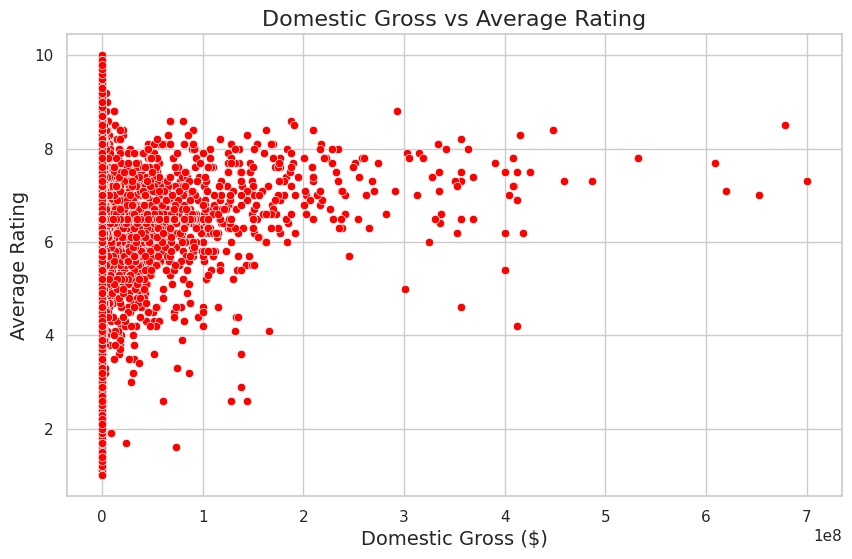

In [38]:
#  Scatter plot for Domestic Gross vs Average Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['domestic_gross'], y=merged_df['averagerating'], color='red')
plt.title('Domestic Gross vs Average Rating', fontsize=16)
plt.xlabel('Domestic Gross ($)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

## Interpretation:

There is a moderate positive relationship between domestic gross and average rating.

Movies with higher ratings tend to perform better at the box office, but there are many exceptions.

## Runtime Optimization

<ipython-input-39-aff21ca230d4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_avg = merged_df.groupby(runtime_bins)['averagerating'].mean()


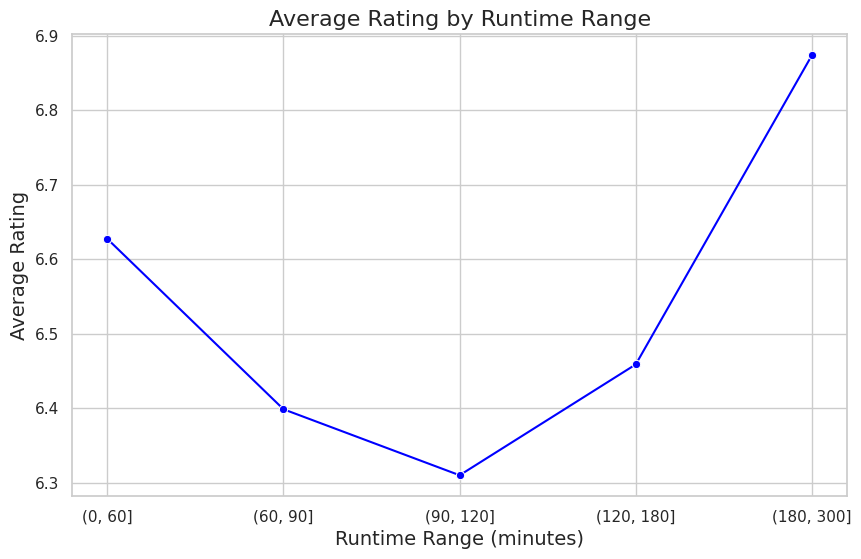

In [39]:
runtime_bins = pd.cut(merged_df['runtime_minutes'], bins=[0, 60, 90, 120, 180, 300])
runtime_avg = merged_df.groupby(runtime_bins)['averagerating'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=runtime_avg.index.astype(str), y=runtime_avg.values, marker='o', color='blue')
plt.title('Average Rating by Runtime Range', fontsize=16)
plt.xlabel('Runtime Range (minutes)', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()

## Interpretation:


*   Movies with runtimes between 90 and 120 minutes tend to have the highest average ratings.
*   Extremely short or long movies tend to have lower ratings.




## Audience Engagement
Finally, we analyzed the distribution of votes for movies with significant engagement (movies with more than 1,000 votes).

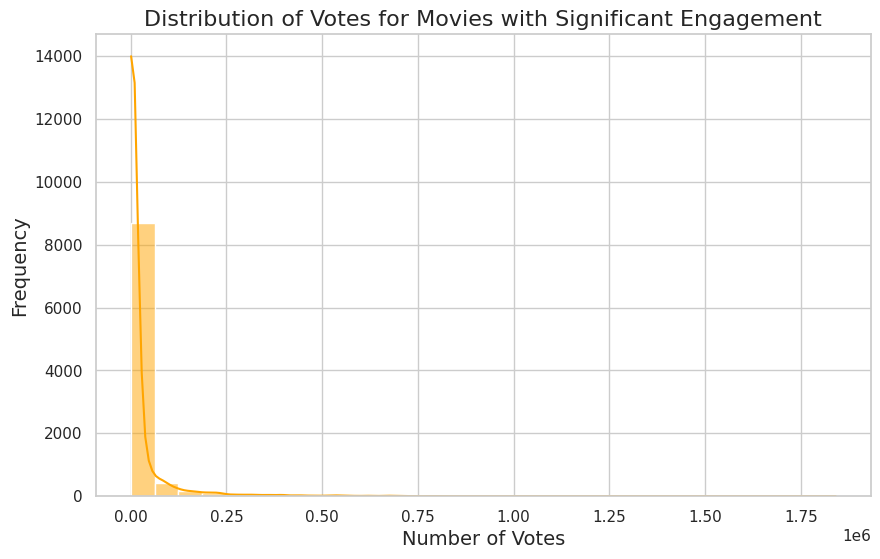

In [40]:
#  Audience Votes as Popularity Proxy
high_vote_movies = merged_df[merged_df['numvotes'] > 1000]
plt.figure(figsize=(10, 6))
sns.histplot(high_vote_movies['numvotes'], bins=30, kde=True, color='orange')
plt.title('Distribution of Votes for Movies with Significant Engagement', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## Interpretation:


*   The distribution of votes is highly skewed, with most movies having a few thousand votes and a few movies having tens of thousands of votes.
*  This indicates that only a small number of movies receive significant audience engagement.

# Average Domestic Gross by Rating Range

<ipython-input-41-e7fef9c58161>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_revenue = merged_df.groupby(pd.cut(merged_df['averagerating'], bins=[0, 5, 7, 10]))['domestic_gross'].mean()
<ipython-input-41-e7fef9c58161>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_revenue.index.astype(str), y=rating_revenue.values, palette='coolwarm')


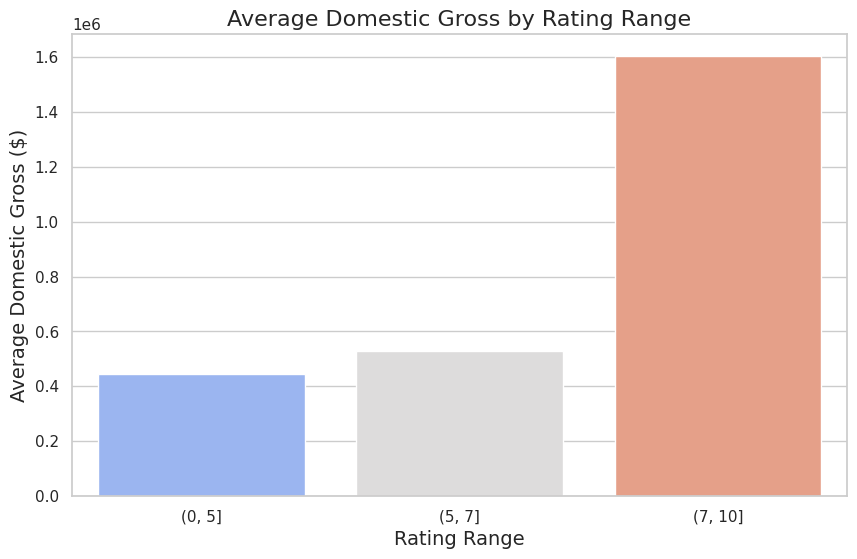

In [41]:
# Revenue by Rating Threshold
rating_revenue = merged_df.groupby(pd.cut(merged_df['averagerating'], bins=[0, 5, 7, 10]))['domestic_gross'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_revenue.index.astype(str), y=rating_revenue.values, palette='coolwarm')
plt.title('Average Domestic Gross by Rating Range', fontsize=16)
plt.xlabel('Rating Range', fontsize=14)
plt.ylabel('Average Domestic Gross ($)', fontsize=14)
plt.show()

## Interpretation:

 This indicates movies with higher ratings tend to dominate the revenue landscape, while low-rated movies struggle to make a substantial financial impact. This highlights the importance of producing high-quality films that resonate with audiences to maximize revenue potential.



# MORE VISUALIZATIONS ON THE DATA

## Domestic vs. Foreign Gross Earnings Scatter Plot

This plot will help you visualize the relationship between domestic and foreign gross earnings.

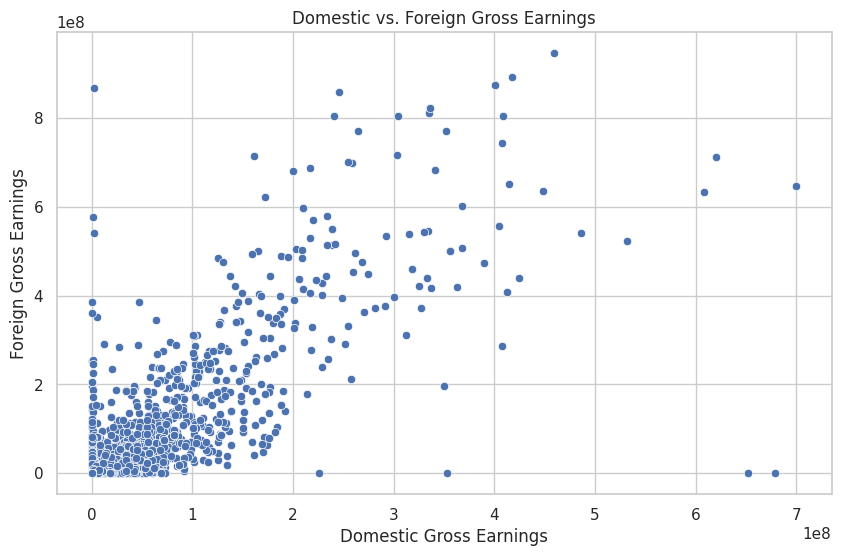

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='domestic_gross', y='foreign_gross', data=merged_df)
plt.title('Domestic vs. Foreign Gross Earnings')
plt.xlabel('Domestic Gross Earnings')
plt.ylabel('Foreign Gross Earnings')
plt.show()

## Genre Distribution Bar Plot
This plot will show the distribution of movies across different genres.

<ipython-input-43-fcf653908c2d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


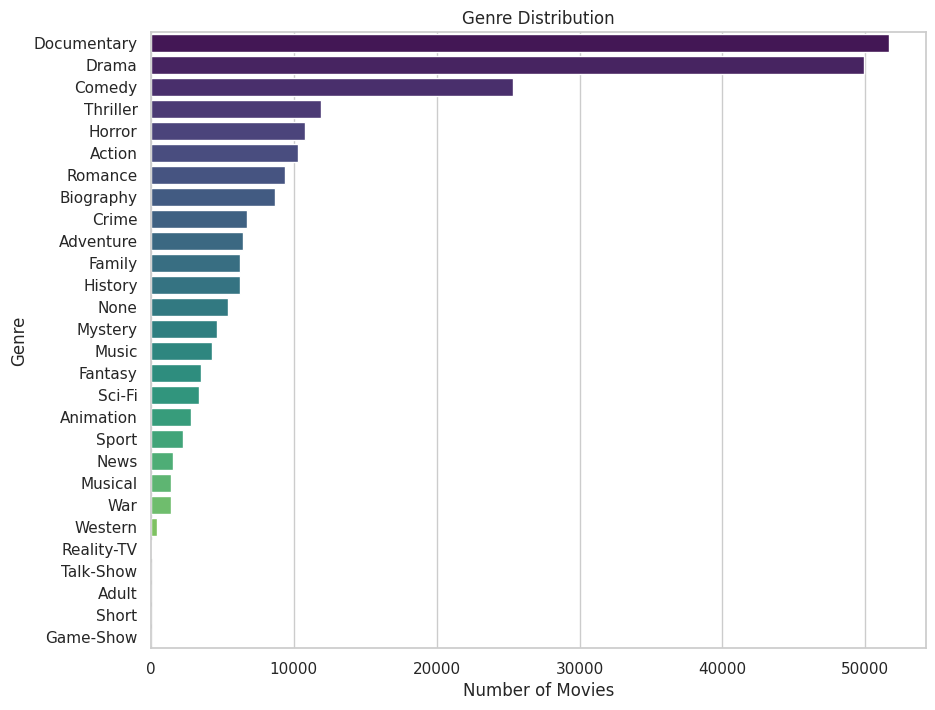

In [43]:
# Flatten the genres list
genres_list = merged_df['genres'].explode()

# Count the occurrences of each genre
genre_counts = genres_list.value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

## Box Office Performance by Genre
This plot will show the average domestic gross earnings by genre.

<ipython-input-44-8d9b0e9c63ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='magma')


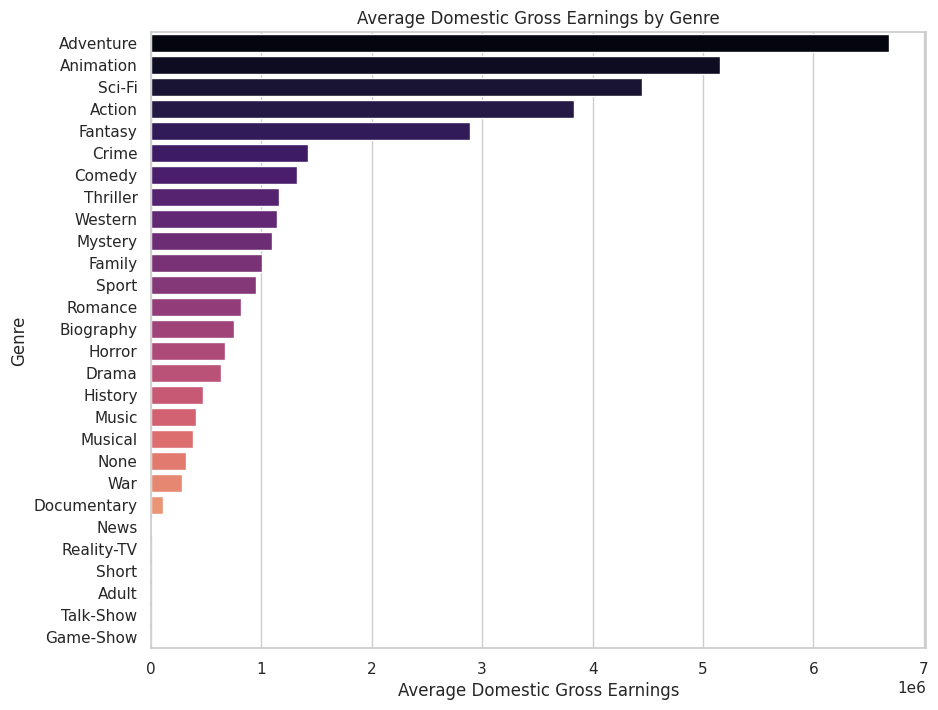

In [44]:
# Explode the genres list and merge with domestic gross
genre_gross = merged_df.explode('genres').groupby('genres')['domestic_gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='magma')
plt.title('Average Domestic Gross Earnings by Genre')
plt.xlabel('Average Domestic Gross Earnings')
plt.ylabel('Genre')
plt.show()

## Correlation Heatmap
This heatmap will show the correlation between different numerical variables in the dataset.

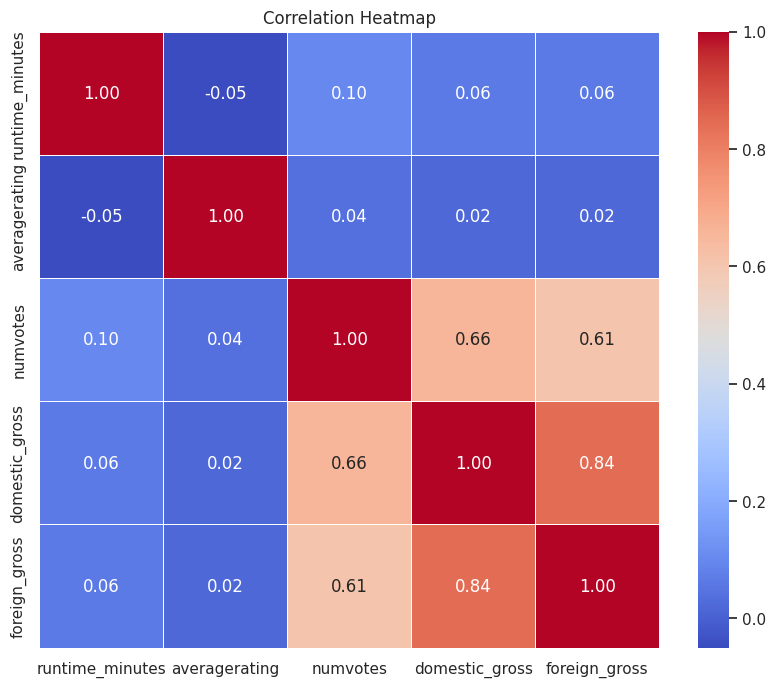

In [45]:
# Select numerical columns for correlation
numerical_columns = ['runtime_minutes', 'averagerating', 'numvotes', 'domestic_gross', 'foreign_gross']
correlation_matrix = merged_df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Top 10 Studios by Domestic Gross Earnings
This plot will show the top 10 studios based on their domestic gross earnings.

<ipython-input-46-1df9efe4915d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_studios.values, y=top_studios.index, palette='plasma')


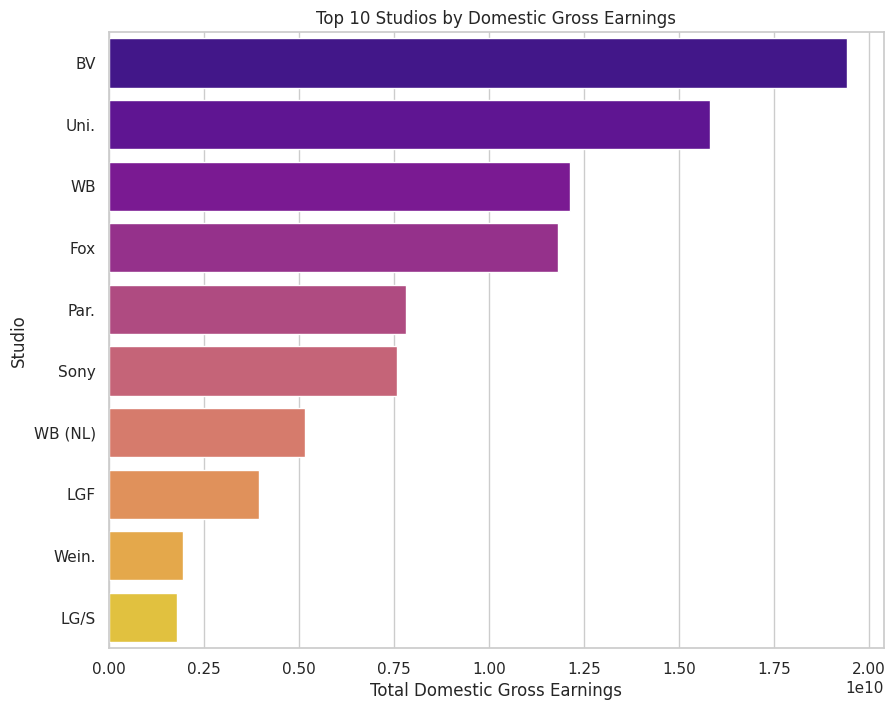

In [46]:
top_studios = merged_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_studios.values, y=top_studios.index, palette='plasma')
plt.title('Top 10 Studios by Domestic Gross Earnings')
plt.xlabel('Total Domestic Gross Earnings')
plt.ylabel('Studio')
plt.show()

# Key Findings


1. **Domestic vs. Foreign Gross Earnings**: There is a strong positive correlation between domestic and foreign gross earnings. Action, Adventure, and Animation genres perform exceptionally well in both markets, while genres like Comedy and Drama tend to have stronger domestic appeal.

2.  **Review Sentiment and Earnings**: Movies with higher Rotten Tomatoes scores (both critic and audience ratings) consistently achieve higher box office earnings. Dramas and Documentaries often receive higher critical ratings, while Action and Animation films receive higher audience ratings.

3. **Popular Genres and Revenue Performance**: Action, Adventure, and Animation are the most popular genres in terms of vote averages, popularity, and revenue performance. These genres align strongly with higher revenue, indicating strong audience demand.

4. **Production Budgets and ROI**: Higher production budgets generally correlate with higher worldwide and domestic gross earnings. However, mid-budget films (between 50M & 100M) often achieve the best ROI, balancing production quality with manageable costs.


5. **IMDb Ratings and Success**: Movies with IMDb ratings of 7.0 and above consistently perform better in terms of box office earnings and audience engagement. Higher-rated movies in genres like Drama and Documentary tend to have stronger critical acclaim, while Action and Animation films with moderate ratings still perform well commercially.


6. **Runtime Optimization**: Movies with runtimes between 90 and 120 minutes strike the best balance between audience satisfaction and profitability. Longer runtimes (>120 minutes) appeal to niche audiences but may limit broader appeal.


7. **Audience Engagement and Franchise Potential**: Movies with high audience engagement (measured by vote counts and social media buzz) tend to perform better at the box office. Franchise films or sequels within high-performing genres (e.g., Action, Adventure) drive repeat viewership and long-term profitability.






# Recommendations


1.   **Focus on High-Performing Genres**: Prioritize production of Action, Adventure, and Animation films to capitalize on their popularity and revenue potential. Explore emerging sub-genres or hybrid genres to stay ahead of trends.

2.   **Optimize Budget Allocation**: Focus on mid-budget films to maximize ROI. For high-budget films, ensure strong marketing and distribution strategies to justify the investment. Diversify the portfolio by including a mix of high-budget blockbusters and low-budget indie films to balance risk and reward.

3.   **Aim for High Ratings**: Prioritize quality to achieve IMDb ratings of 7.0 or higher. Use test screenings and audience feedback to refine films before release. For Drama and Documentary films, focus on critical acclaim and awards potential. For Action and Animation, prioritize audience engagement and entertainment value.
4.   **Target Optimal Runtime**: Aim for a runtime of 90-120 minutes for mainstream releases to maximize audience appeal and profitability.           For prestige or award-season projects, consider slightly longer runtimes to cater to niche audiences.


5.   **Build Franchise Potential**: Develop franchise opportunities within high-performing genres. Start with standalone stories and expand into sequels or shared universes based on audience feedback and success metrics.


6.  **Boost Audience Engagement**: Invest in robust marketing campaigns to drive pre-release buzz and audience engagement. Use positive reviews as a marketing tool, especially for genres like Drama and Documentary, which rely heavily on critical acclaim.



7.   **Conduct Market Research**: Gather data on audience preferences within high-performing genres and key markets. Use analytics to stay updated on genre, runtime, and audience engagement trends.







# Next Steps

* **Conduct Audience Research**: Understand audience preferences and emerging trends.

* **Build a Test Screening Pipeline**: Refine films during production to ensure high ratings.

* **Monitor Emerging Trends**: Use analytics to stay updated on genre and runtime trends.



* **Allocate Marketing Budgets Strategically**: Focus on campaigns that boost pre-release engagement.




* **Diversify Portfolio:** Balance high-budget blockbusters with mid-budget and low-budget films to manage risk and maximize ROI.









# **Final Thoughts**

By aligning production strategies with these insights, Microsoft's new movie studio can maximize its chances of success in the competitive film industry. Focusing on high-performing genres, optimizing runtime, prioritizing quality, and leveraging audience engagement will help the studio create films that resonate with audiences and achieve strong box office performance. Additionally, building franchise potential and diversifying the portfolio will ensure long-term profitability and sustainability. This comprehensive approach will position Microsoft as a strong contender in the entertainment industry, delivering films that captivate audiences and drive revenue.